/tmp/ipykernel_917334/557398508.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = model.predict(test_data[['day_of_week', 'month']])


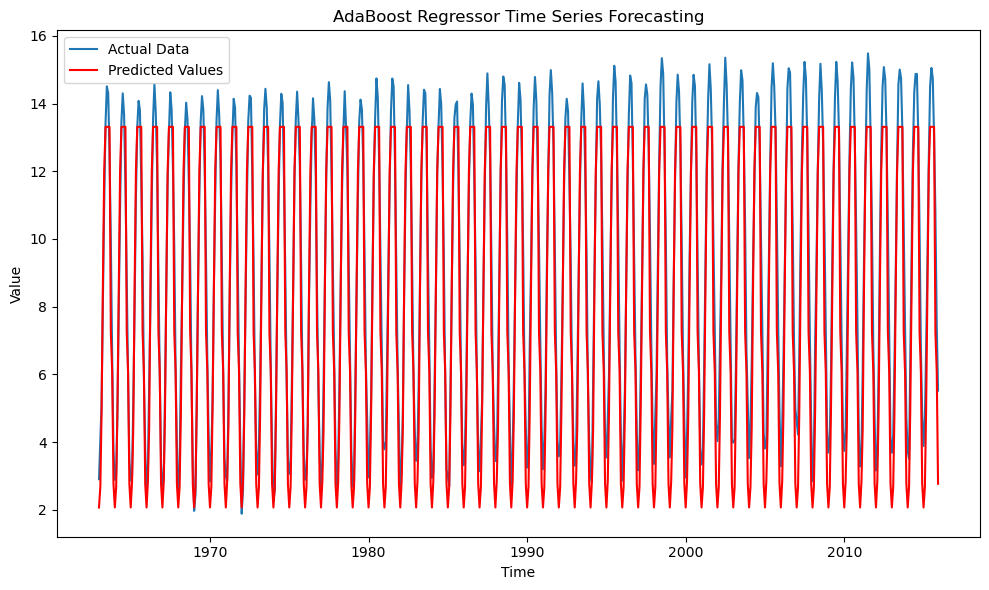

RMSE: 1.2315008296163636
Mean Squared Error: 1.5166
Mean Absolute Percentage Error (MAPE): 14.6444%


In [1]:
#for GlobalTemperature
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df=pd.read_csv('GlobalTemperatures.csv')
df = df[['dt', 'LandAverageTemperature']]
df = df.dropna()
df["dt"] = pd.to_datetime(df["dt"])
df.head()
#df['Date']=df["dt"].dt.date
df_date=pd.DataFrame(df.groupby('dt')['LandAverageTemperature'].mean())
df_date = df_date.reset_index()
df_date['dt'] = pd.to_datetime(df_date['dt'])

# Extract day of the week and month from the date
df_date['day_of_week'] = df_date['dt'].dt.dayofweek
df_date['month'] = df_date['dt'].dt.month

# Split the data into train and test sets
train_size = int(0.8 * len(df_date))
train_data = df_date[:train_size]
test_data = df_date[train_size:]

# Initialize and fit the AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=50, random_state=0)
model.fit(train_data[['day_of_week', 'month']], train_data['LandAverageTemperature'])
# Create test_data with day_of_week and month
test_data['predictions'] = model.predict(test_data[['day_of_week', 'month']])

# Plot the actual data, predicted values, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['dt'], test_data['LandAverageTemperature'], label='Actual Data')
plt.plot(test_data['dt'], test_data['predictions'], label='Predicted Values', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AdaBoost Regressor Time Series Forecasting')
plt.legend()
plt.tight_layout()
plt.show()


# Calculate RMSE
rmse = mean_squared_error(test_data['LandAverageTemperature'], test_data['predictions'], squared=False)
print("RMSE:", rmse)

# Calculate Mean Squared Error
mse = mean_squared_error(test_data['LandAverageTemperature'], test_data['predictions'])
print(f"Mean Squared Error: {mse:.4f}")


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['LandAverageTemperature'], test_data['predictions'])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")






/tmp/ipykernel_917334/60314552.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = model.predict(test_data[['day_of_week', 'month']])


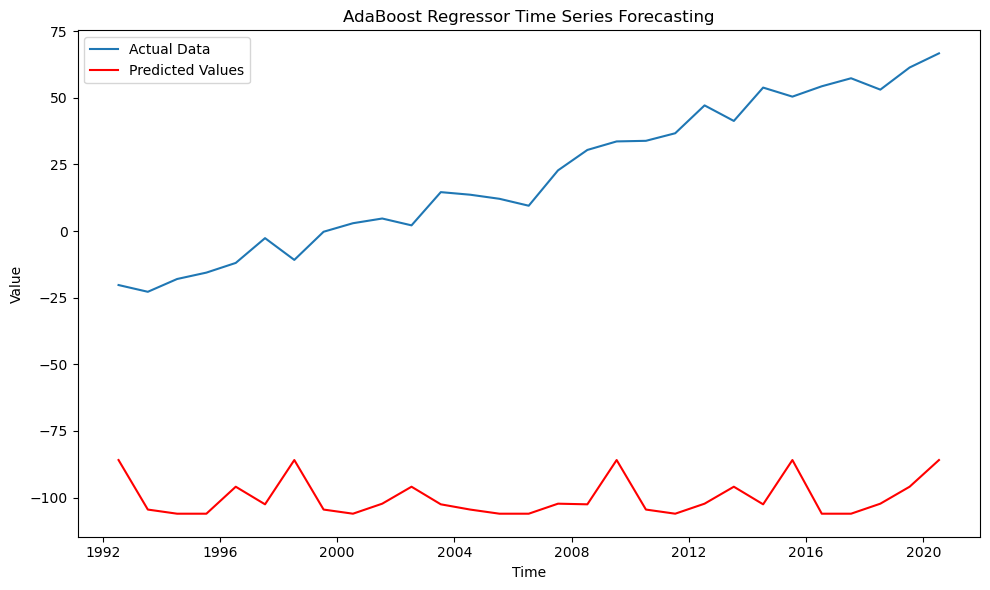

RMSE: 123.80606968543458
Mean Squared Error: 15327.9429
Mean Absolute Percentage Error (MAPE): 2349.9207%


In [2]:
#for sealevel Rise
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df=pd.read_csv('Global_sea_level_rise.csv')
df = df[['date', 'mmfrom1993-2008average']]
df = df.dropna()
df["date"] = pd.to_datetime(df["date"])
df.head()
#df['Date']=df["dt"].dt.date
df_date=pd.DataFrame(df.groupby('date')['mmfrom1993-2008average'].mean())
df_date = df_date.reset_index()
df_date['date'] = pd.to_datetime(df_date['date'])

# Extract day of the week and month from the date
df_date['day_of_week'] = df_date['date'].dt.dayofweek
df_date['month'] = df_date['date'].dt.month

# Split the data into train and test sets
train_size = int(0.8 * len(df_date))
train_data = df_date[:train_size]
test_data = df_date[train_size:]

# Initialize and fit the AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=50, random_state=0)
model.fit(train_data[['day_of_week', 'month']], train_data['mmfrom1993-2008average'])
# Create test_data with day_of_week and month
test_data['predictions'] = model.predict(test_data[['day_of_week', 'month']])

# Plot the actual data, predicted values, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['date'], test_data['mmfrom1993-2008average'], label='Actual Data')
plt.plot(test_data['date'], test_data['predictions'], label='Predicted Values', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AdaBoost Regressor Time Series Forecasting')
plt.legend()
plt.tight_layout()
plt.show()


# Calculate RMSE
rmse = mean_squared_error(test_data['mmfrom1993-2008average'], test_data['predictions'], squared=False)
print("RMSE:", rmse)

# Calculate Mean Squared Error
mse = mean_squared_error(test_data['mmfrom1993-2008average'], test_data['predictions'])
print(f"Mean Squared Error: {mse:.4f}")


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['mmfrom1993-2008average'], test_data['predictions'])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")






In [3]:
#for airQuality
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df=pd.read_csv('air-quality-india.csv',encoding='cp1252')
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.head()
df['Date']=df["Timestamp"].dt.date
df_date=pd.DataFrame(df.groupby('Date')['PM2.5'].mean())
df_date = df_date.reset_index()
df_date['Date'] = pd.to_datetime(df_date['Date'])

# Extract day of the week and month from the date
df_date['day_of_week'] = df_date['Date'].dt.dayofweek
df_date['month'] = df_date['Date'].dt.month

# Split the data into train and test sets
train_size = int(0.8 * len(df_date))
train_data = df_date[:train_size]
test_data = df_date[train_size:]

# Initialize and fit the AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=50, random_state=0)
model.fit(train_data[['day_of_week', 'month']], train_data['PM2.5'])
# Create test_data with day_of_week and month
test_data['predictions'] = model.predict(test_data[['day_of_week', 'month']])

# Plot the actual data, predicted values, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['PM2.5'], label='Actual Data')
plt.plot(test_data['Date'], test_data['predictions'], label='Predicted Values', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AdaBoost Regressor Time Series Forecasting')
plt.legend()
plt.tight_layout()
plt.show()


# Calculate RMSE
rmse = mean_squared_error(test_data['PM2.5'], test_data['predictions'], squared=False)
print("RMSE:", rmse)

# Calculate Mean Squared Error
mse = mean_squared_error(test_data['PM2.5'], test_data['predictions'])
print(f"Mean Squared Error: {mse:.4f}")


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['PM2.5'], test_data['predictions'])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")






/tmp/ipykernel_917334/528719730.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('air-quality-india.csv',encoding='cp1252')


KeyError: 'Timestamp'

In [ ]:
# Forest Cover

